In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import random 
import tensorflow as tf
from PIL import Image
from sklearn.preprocessing import OneHotEncoder 


DIRECTORY = 'skindata'
CATEGORIES = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

IMG_SIZE = 100

data = []
label = []
result = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        img = Image.open(img_path)
        img = img.resize((IMG_SIZE,IMG_SIZE))
        img = np.array(img)
        if(img.shape == (IMG_SIZE,IMG_SIZE,3)):
            data.append([np.array(img), label])

In [2]:
data[0][0].shape
random.shuffle(data)

In [3]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

X = np.array(X)
y = np.array(y)
X.shape

(5040, 100, 100, 3)

In [4]:
X = X/255

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=1)
X_train = np.array(X_train)
X_train.shape

(4032, 100, 100, 3)

In [6]:
import tensorflow as tf
from keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras import datasets, layers, models
from keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
import keras.backend as K
import numpy as np
from keras import Input, layers
from keras.models import Model

def my_filter(shape, dtype=None):
    
    f = np.array(([
              [[[0.49], [0.31], [0.2]], [[0.17697], [0.8124], [0.01063]], [[0], [0.06], [0.99]]], 
              [[[0.49], [0.31], [0.2]], [[0.17697], [0.8124], [0.01063]], [[0], [0.06], [0.99]]],
              [[[0.49], [0.31], [0.2]], [[0.17697], [0.8124], [0.01063]], [[0], [0.06], [0.99]]],
             ]), np.float32)/0.17697
    print(f.shape)
    print(shape)
    try:
        assert f.shape == shape
    
    except AssertionError as msg:
        print(msg)
    
    return K.variable(f, dtype='float32')



cnn = models.Sequential()

cnn.add(layers.Conv2D(filters=1, kernel_size=(3,3), kernel_initializer=my_filter,strides=(1,1),  padding='same', activation='relu', input_shape = (100,100,3)))
cnn.add(BatchNormalization())
cnn.add(layers.MaxPooling2D((2, 2)))
# cnn.add(Dropout(0.15))
trainable=False

cnn.add(layers.Conv2D(128, strides=(1,1), kernel_size=(3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(BatchNormalization(momentum=0.8))

cnn.add(layers.Conv2D(256, strides=(1,1), kernel_size=(3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.35))
cnn.add(BatchNormalization(momentum=0.8))

cnn.add(layers.Conv2D(512, strides=(1,1), kernel_size=(3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.35))
cnn.add(BatchNormalization(momentum=0.9))

cnn.add(layers.Conv2D(256, strides=(1,1), kernel_size=(3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.3))
cnn.add(BatchNormalization())

cnn.add(layers.Conv2D(128, strides=(1,1), kernel_size=(1, 1), activation='relu'))
cnn.add(layers.MaxPooling2D(pool_size=(1, 1)))
cnn.add(Dropout(0.25))
cnn.add(BatchNormalization())

cnn.add(Flatten())
cnn.add(Dense(7, activation='softmax'))

cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# 66.75.  96.56.  41.77
# 99.5.   98.07   62.00

(3, 3, 3, 1)
(3, 3, 3, 1)


In [7]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10, shuffle=True)
import matplotlib.pyplot as plt
i = 0
for train_idx, test_idx in folds.split(X_train,y_train):
    i=i+1
    print("----------------------------------------- ", i, " -----------------------------------------")
    X_tr, X_te, y_tr, y_te = X_train[train_idx], X_train[test_idx], \
                                       y_train[train_idx], y_train[test_idx]
    history = cnn.fit(X_tr,y_tr,epochs=20,validation_data=(X_te,y_te),batch_size=32,verbose=1)

-----------------------------------------  1  -----------------------------------------
Epoch 1/20
114/114 [==============================] - 10s 86ms/step - loss: 2.0030 - accuracy: 0.2585 - val_loss: 2.1284 - val_accuracy: 0.1584
Epoch 2/20
114/114 [==============================] - 9s 83ms/step - loss: 1.7366 - accuracy: 0.3131 - val_loss: 1.9695 - val_accuracy: 0.2104
Epoch 3/20
114/114 [==============================] - 9s 83ms/step - loss: 1.6613 - accuracy: 0.3382 - val_loss: 1.9067 - val_accuracy: 0.2624
Epoch 4/20
114/114 [==============================] - 9s 83ms/step - loss: 1.5775 - accuracy: 0.3688 - val_loss: 1.6682 - val_accuracy: 0.3589
Epoch 5/20
114/114 [==============================] - 9s 82ms/step - loss: 1.5421 - accuracy: 0.3831 - val_loss: 1.8198 - val_accuracy: 0.2970
Epoch 6/20
114/114 [==============================] - 9s 83ms/step - loss: 1.4722 - accuracy: 0.4214 - val_loss: 1.8165 - val_accuracy: 0.3020
Epoch 7/20
114/114 [==============================] -

114/114 [==============================] - 9s 83ms/step - loss: 0.1672 - accuracy: 0.9402 - val_loss: 0.6582 - val_accuracy: 0.7792
Epoch 17/20
114/114 [==============================] - 10s 85ms/step - loss: 0.1438 - accuracy: 0.9449 - val_loss: 0.6637 - val_accuracy: 0.7940
Epoch 18/20
114/114 [==============================] - 10s 86ms/step - loss: 0.1568 - accuracy: 0.9474 - val_loss: 0.6625 - val_accuracy: 0.7816
Epoch 19/20
114/114 [==============================] - 10s 90ms/step - loss: 0.1621 - accuracy: 0.9435 - val_loss: 0.4934 - val_accuracy: 0.8288
Epoch 20/20
114/114 [==============================] - 197s 2s/step - loss: 0.1501 - accuracy: 0.9465 - val_loss: 0.5006 - val_accuracy: 0.8313
-----------------------------------------  4  -----------------------------------------
Epoch 1/20
114/114 [==============================] - 1916s 9s/step - loss: 0.1964 - accuracy: 0.9336 - val_loss: 0.2729 - val_accuracy: 0.9181
Epoch 2/20
114/114 [==============================] - 198

Epoch 11/20
114/114 [==============================] - 10s 85ms/step - loss: 0.0798 - accuracy: 0.9686 - val_loss: 0.3148 - val_accuracy: 0.8784
Epoch 12/20
114/114 [==============================] - 10s 87ms/step - loss: 0.0864 - accuracy: 0.9691 - val_loss: 0.1987 - val_accuracy: 0.9330
Epoch 13/20
114/114 [==============================] - 10s 87ms/step - loss: 0.0706 - accuracy: 0.9741 - val_loss: 0.1459 - val_accuracy: 0.9479
Epoch 14/20
114/114 [==============================] - 10s 85ms/step - loss: 0.0729 - accuracy: 0.9738 - val_loss: 0.1728 - val_accuracy: 0.9454
Epoch 15/20
114/114 [==============================] - 10s 86ms/step - loss: 0.0720 - accuracy: 0.9749 - val_loss: 0.2317 - val_accuracy: 0.9330
Epoch 16/20
114/114 [==============================] - 10s 87ms/step - loss: 0.0725 - accuracy: 0.9774 - val_loss: 0.1839 - val_accuracy: 0.9429
Epoch 17/20
114/114 [==============================] - 10s 88ms/step - loss: 0.0707 - accuracy: 0.9774 - val_loss: 0.2226 - val_ac

Epoch 6/20
114/114 [==============================] - 11s 95ms/step - loss: 0.0573 - accuracy: 0.9796 - val_loss: 0.1089 - val_accuracy: 0.9677
Epoch 7/20
114/114 [==============================] - 11s 95ms/step - loss: 0.0511 - accuracy: 0.9835 - val_loss: 0.1258 - val_accuracy: 0.9628
Epoch 8/20
114/114 [==============================] - 11s 97ms/step - loss: 0.0557 - accuracy: 0.9813 - val_loss: 0.0458 - val_accuracy: 0.9901
Epoch 9/20
114/114 [==============================] - 11s 96ms/step - loss: 0.0498 - accuracy: 0.9807 - val_loss: 0.1446 - val_accuracy: 0.9529
Epoch 10/20
114/114 [==============================] - 11s 95ms/step - loss: 0.0534 - accuracy: 0.9840 - val_loss: 0.1187 - val_accuracy: 0.9603
Epoch 11/20
114/114 [==============================] - 11s 96ms/step - loss: 0.0478 - accuracy: 0.9843 - val_loss: 0.2085 - val_accuracy: 0.9355
Epoch 12/20
114/114 [==============================] - 11s 97ms/step - loss: 0.0587 - accuracy: 0.9777 - val_loss: 0.1556 - val_accura

In [8]:
X_test = np.array(X_test)
print(X_test.shape)
print(y_test.shape)

(1008, 100, 100, 3)
(1008,)


In [9]:
cnn.evaluate(X_test,y_test)

# 5570, 4553, 4236 0.35 0.3 0.3
# 5034, 3983, 3770 0.35 0.35 0.35
# 5515, 4665, 4256 0.35 0.35 0.3
# 5449, 4640, 4425 0.35 0.3 0.35

32/32 [==============================] - 1s 25ms/step - loss: 2.5552 - accuracy: 0.5427


[2.5551843643188477, 0.5426587462425232]

In [10]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[8.2911612e-07, 2.3423211e-04, 9.3220519e-03, 3.4452540e-08,
        1.7287534e-03, 7.6317498e-05, 9.8863775e-01],
       [9.9881136e-01, 7.9458687e-06, 7.2736689e-04, 1.0530434e-04,
        3.4064782e-04, 2.0805793e-10, 7.3840379e-06],
       [4.9428087e-01, 9.0617687e-03, 9.3235811e-03, 6.8377267e-06,
        4.8732549e-01, 6.0621829e-08, 1.3173768e-06],
       [1.6676101e-03, 9.9483383e-01, 3.3153035e-05, 2.4334537e-03,
        2.2631978e-07, 4.4405682e-05, 9.8743767e-04],
       [6.3184774e-03, 3.7476579e-03, 9.8251358e-02, 1.0252422e-05,
        2.6754460e-03, 1.9289196e-01, 6.9610482e-01]], dtype=float32)

In [11]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[6, 0, 0, 1, 6]

In [12]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report(K-fold): \n", classification_report(y_test, y_pred_classes))

Classification Report(K-fold): 
               precision    recall  f1-score   support

           0       0.41      0.54      0.47       144
           1       0.37      0.60      0.45       144
           2       0.37      0.30      0.33       144
           3       0.78      0.63      0.70       144
           4       0.76      0.33      0.46       144
           5       0.86      0.70      0.77       144
           6       0.58      0.70      0.64       144

    accuracy                           0.54      1008
   macro avg       0.59      0.54      0.55      1008
weighted avg       0.59      0.54      0.55      1008



Text(69.0, 0.5, 'Truth')

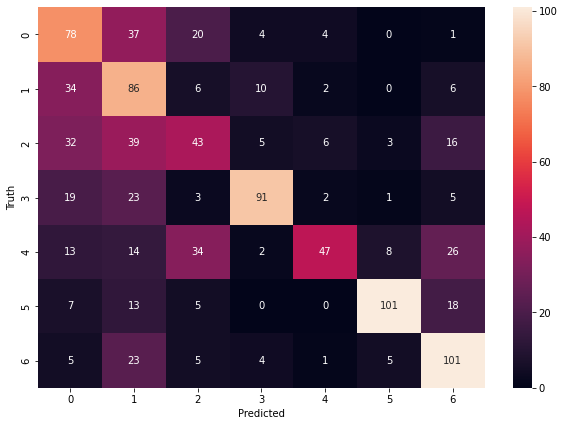

In [13]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_classes)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')